In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
#notification magic
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [5]:
%%notify
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

<IPython.core.display.Javascript object>

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set, why this way? use train_test_split!
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [8]:
%%notify
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


<IPython.core.display.Javascript object>

In [9]:
print('The average accuracy is {}%'.format(clf.score(X, y) * 100))

The average accuracy is 77.48864612740887%


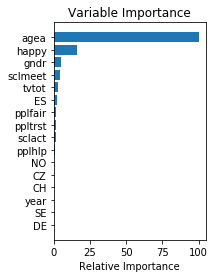

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## My turn now!

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [12]:
df.drop(columns=['idno'], inplace=True)

In [13]:
df.head()

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [15]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=2, loss='deviance')
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [16]:
pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

print('Our model is {}% accurate'.format(clf.score(X_test, y_test) * 100))
print('False Positives: {}'.format(fp))
print('False Positive Percent: {}%'.format(fp / len(y_test) * 100))
print('False Negatives: {}'.format(fn))
print('False Negative Percent: {}%'.format(fn/ len(y_test) * 100))

Our model is 74.47852760736197% accurate
False Positives: 36
False Positive Percent: 4.41717791411043%
False Negatives: 172
False Negative Percent: 21.104294478527606%


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)

print(scores)
print('The average is {}'.format(scores.mean() * 100))
print('The std is {}'.format(scores.std() * 100))

[0.75460123 0.71165644 0.7607362  0.72392638 0.67484663]
The average is 72.51533742331289
The std is 3.1137613596195153


### With exponential loss function

In [18]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=2, loss='exponential')
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [19]:
pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

print('Our model is {}% accurate'.format(clf.score(X_test, y_test) * 100))
print('False Positives: {}'.format(fp))
print('False Positive Percent: {}%'.format(fp / len(y_test) * 100))
print('False Negatives: {}'.format(fn))
print('False Negative Percent: {}%'.format(fn/ len(y_test) * 100))

Our model is 74.3558282208589% accurate
False Positives: 34
False Positive Percent: 4.171779141104294%
False Negatives: 175
False Negative Percent: 21.472392638036812%


In [22]:
print(scores)

scores = cross_val_score(clf, X_test, y_test, cv=5)
print('The average is {}'.format(scores.mean() * 100))
print('The std is {}'.format(scores.std() * 100))

[0.75460123 0.71165644 0.7607362  0.72392638 0.67484663]
The average is 72.88343558282209
The std is 2.888000563420818


So, exponential seems to perform a little worse, but about the same.

### Try and tune our max_depth

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [31]:
%%notify
averages = []
for i in range(1, 11):
    clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=i, loss='deviance')
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    averages.append(scores.mean())
    print('Max Depth: {}'.format(i))
    print('The average is {}'.format(scores.mean() * 100))
    print('The std is {}'.format(scores.std() * 100))
    print('')

Max Depth: 1
The average is 73.62107281604514
The std is 3.121625106113932

Max Depth: 2
The average is 72.76140123364424
The std is 2.388703342105651

Max Depth: 3
The average is 72.39106780979195
The std is 2.1467643216945738

Max Depth: 4
The average is 71.53815744019745
The std is 1.5373708572277993

Max Depth: 5
The average is 72.15168208260133
The std is 2.017039338230136

Max Depth: 6
The average is 71.16479440186359
The std is 2.3033877748772564

Max Depth: 7
The average is 71.53063882377066
The std is 1.6232418598372866

Max Depth: 8
The average is 72.02596231824621
The std is 2.9293065837337333

Max Depth: 9
The average is 71.53438889535452
The std is 1.4060625401261277

Max Depth: 10
The average is 72.15241177633317
The std is 1.716744022658991



<IPython.core.display.Javascript object>

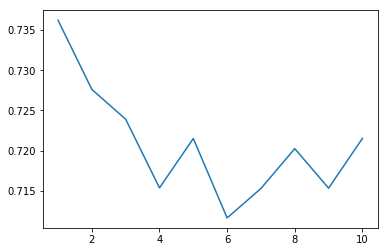

In [32]:
sns.lineplot(np.arange(1, 11), averages)
plt.show()

I would use a max depth of 1! Let's see if we can tune any of our other params.

In [37]:
estimators = np.arange(1, 1002, 50)

21

In [40]:
%%notify
averages = []
for i in range(len(estimators)):
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators[i], max_depth=1, loss='deviance')
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    averages.append(scores.mean())
    print('Estimators: {}'.format(estimators[i]))
    print('The average is {}'.format(scores.mean() * 100))
    print('The std is {}'.format(scores.std() * 100))
    print('')

Estimators: 1
The average is 64.049504639559
The std is 0.14526820912685426

Estimators: 51
The average is 73.00454626904825
The std is 2.48892665832227

Estimators: 101
The average is 73.62107281604514
The std is 3.121625106113932

Estimators: 151
The average is 73.98843204519298
The std is 3.020665388273692

Estimators: 201
The average is 73.86422708807866
The std is 2.750157494862189

Estimators: 251
The average is 73.86346968445827
The std is 2.917198826707603

Estimators: 301
The average is 74.11114066832558
The std is 2.7579028394177763

Estimators: 351
The average is 73.98768387820212
The std is 2.8250625150295208

Estimators: 401
The average is 73.86422708807866
The std is 2.9116766627154727

Estimators: 451
The average is 73.86422708807866
The std is 3.2496084348538887

Estimators: 501
The average is 73.86422708807866
The std is 3.2496084348538887

Estimators: 551
The average is 73.74152770157558
The std is 3.5295225326954878

Estimators: 601
The average is 73.86423632470816
T

<IPython.core.display.Javascript object>

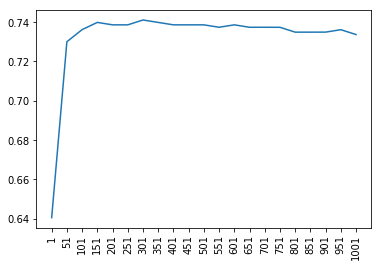

In [47]:
sns.lineplot(estimators, averages)
plt.xticks(estimators, rotation='vertical')
plt.show()

Seems like 151 is our best bet!

In [49]:
%%notify
leaves = np.arange(1, 101, 5)
averages = []
for i in range(len(leaves)):
    clf = ensemble.GradientBoostingClassifier(n_estimators=151, max_depth=1, loss='deviance', min_samples_leaf=leaves[i])
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    averages.append(scores.mean())
    print('Estimators: {}'.format(leaves[i]))
    print('The average is {}'.format(scores.mean() * 100))
    print('The std is {}'.format(scores.std() * 100))
    print('')

Estimators: 1
The average is 73.98843204519298
The std is 3.020665388273692

Estimators: 6
The average is 73.62032464905425
The std is 2.80038716545131

Estimators: 11
The average is 74.11113143169605
The std is 3.1379760699304

Estimators: 16
The average is 74.60044188035609
The std is 2.910257886207356

Estimators: 21
The average is 73.74379067580725
The std is 3.1993553273568085

Estimators: 26
The average is 73.49687709556034
The std is 3.2119521886857885

Estimators: 31
The average is 73.25146908592468
The std is 3.1002402205045065

Estimators: 36
The average is 73.37342954206638
The std is 2.5812783411349933

Estimators: 41
The average is 72.76292527751454
The std is 2.607745451831809

Estimators: 46
The average is 72.02520491462583
The std is 2.3202976796181285

Estimators: 51
The average is 72.27136109125236
The std is 1.956272871898347

Estimators: 56
The average is 72.27136109125236
The std is 1.956272871898347

Estimators: 61
The average is 72.14565056352676
The std is 2.411

<IPython.core.display.Javascript object>

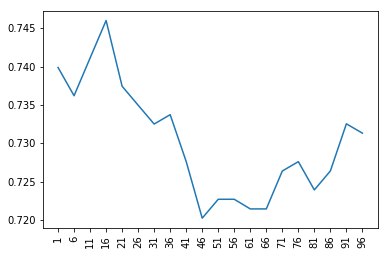

In [51]:
sns.lineplot(leaves, averages)
plt.xticks(leaves, rotation='vertical')
plt.show()

16 is the winner!

So, to tune our parameters we have:
  
1. n_estimators: 151
2. max_depth: 1
3. min_sample_leaves = 16